In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use("ggplot")

In [2]:
data = pd.read_csv("heart_disease_data.csv")

In [3]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.target.unique()

array([1, 0])

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
data["target"].value_counts()*100/len(data)

target
1    54.455446
0    45.544554
Name: count, dtype: float64

<Axes: xlabel='target'>

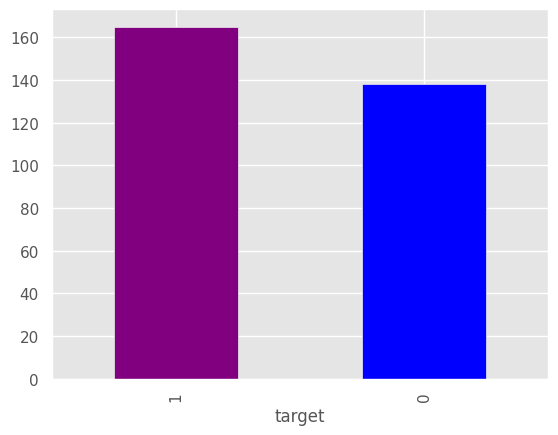

In [10]:
data['target'].value_counts().plot(kind="bar", color=["purple", "blue"])

In [11]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


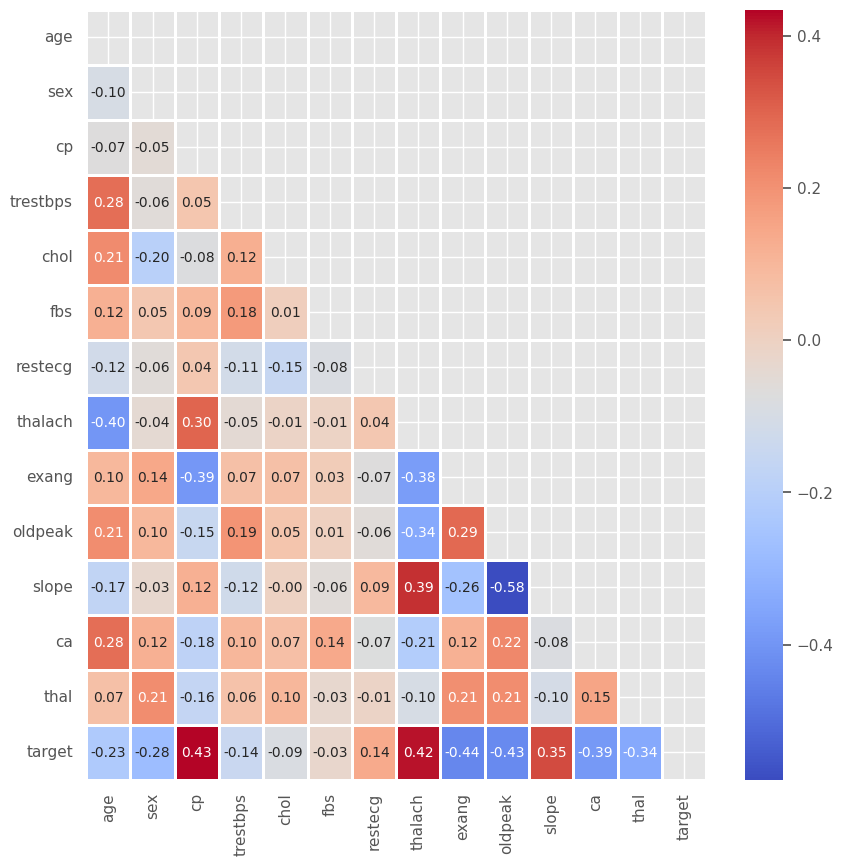

In [12]:
plt.figure(figsize=(10,10))
corr=data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, linewidths=1, annot=True, fmt = ".2f", cmap="coolwarm")
plt.show()

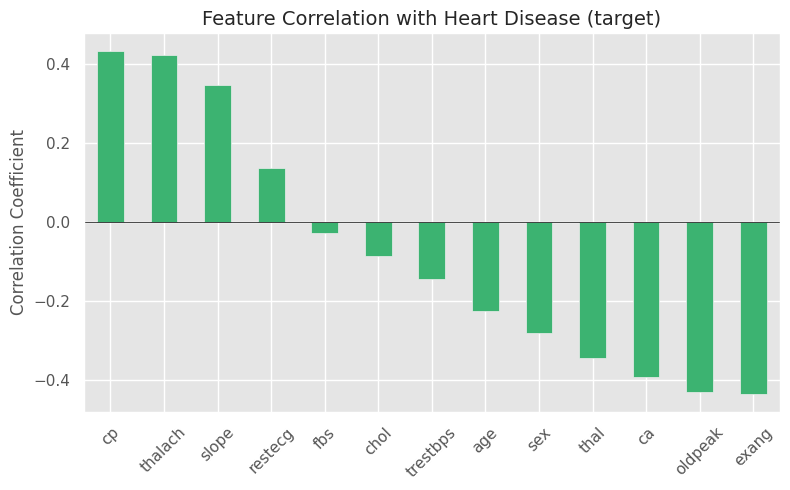

In [13]:
cor_target = data.corr()["target"].drop("target").sort_values(ascending=False)


plt.figure(figsize=(8, 5))
cor_target.plot(kind="bar", color="mediumseagreen")
plt.title("Feature Correlation with Heart Disease (target)", fontsize=14)
plt.axhline(0, color='black', linewidth=0.5)
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
X = data.drop("target", axis = 1)
y = data["target"]

In [15]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [16]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
X_train.shape

(242, 13)

In [20]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [21]:
y_pred = log_reg.predict(X_test)

In [22]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, log_reg.predict(X_train)))
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(log_reg_acc)
y_pred = log_reg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8429752066115702
0.8524590163934426
[[21  6]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [24]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [25]:
y_pred = knn.predict(X_test)

In [26]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [27]:
print(accuracy_score(y_train, knn.predict(X_train)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8677685950413223
0.819672131147541
[[21  6]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.83      0.85      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc = SVC(probability = True)

parameters = {
    "gamma" : [0.0001, 0.001, 0.01, 0.1],
    "C" : [0.01, 0.05, 0.5, 0.1, 1, 10]
    
}
grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

,estimator,SVC(probability=True)
,param_grid,"{'C': [0.01, 0.05, ...], 'gamma': [0.0001, 0.001, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [29]:
grid_search.best_params_

{'C': 1, 'gamma': 0.01}

In [30]:
grid_search.best_score_

np.float64(0.8227040816326531)

In [31]:
svc = SVC(C=10, gamma= 0.01, probability=True)
svc.fit(X_train, y_train)

,C,10
,kernel,'rbf'
,degree,3
,gamma,0.01
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [32]:
y_pred = svc.predict(X_test)

In [33]:
y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [34]:
print(accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.871900826446281
0.8688524590163934
[[21  6]
 [ 2 32]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.84      0.94      0.89        34

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



In [35]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
parameters = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : range(2,32,1),
    "min_samples_leaf" : range(1, 10, 1),
    "min_samples_split" : range(2,10,1),
    "splitter" : ["best", "random"]
}

grid_search_dt = GridSearchCV(dtc, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': range(2, 32), 'min_samples_leaf': range(1, 10), 'min_samples_split': range(2, 10), ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [36]:
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 31,
 'min_samples_leaf': 7,
 'min_samples_split': 5,
 'splitter': 'random'}

In [37]:
grid_search_dt.best_score_

np.float64(0.8391156462585034)

In [38]:
dtc = DecisionTreeClassifier(criterion="gini", max_depth=19, min_samples_leaf=8, min_samples_split=9, splitter="random")

In [39]:
dtc.fit(X_train, y_train)

,criterion,'gini'
,splitter,'random'
,max_depth,19
,min_samples_split,9
,min_samples_leaf,8
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [40]:
print(accuracy_score(y_train, dtc.predict(X_train)))
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)
y_pred = dtc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.859504132231405
0.8032786885245902
[[21  6]
 [ 6 28]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        27
           1       0.82      0.82      0.82        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [41]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 0.5, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

,n_estimators,130
,criterion,'entropy'
,max_depth,10
,min_samples_split,3
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,0.5
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [42]:
y_pred = rand_clf.predict(X_test)

In [43]:
y_pred = rand_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, rand_clf.predict(X_train)))
rand_clf_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(rand_clf_acc)
y_pred = rand_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9834710743801653
0.8360655737704918
[[21  6]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gbc = GradientBoostingClassifier()
parameters = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0.001, 0.1],
    'n_estimators': [100, 150, 180]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv=2, n_jobs=-1, verbose=1)
grid_search_gbc.fit(X_train, y_train)

print(grid_search_gbc.best_params_)

best_gbc = grid_search_gbc.best_estimator_

Fitting 2 folds for each of 12 candidates, totalling 24 fits
{'learning_rate': 0.1, 'loss': 'log_loss', 'n_estimators': 150}


In [45]:
grid_search_gbc.best_score_

np.float64(0.7851239669421488)

In [46]:
y_pred_train = best_gbc.predict(X_train)
y_pred_test = best_gbc.predict(X_test)

gbc_acc = accuracy_score(y_train, y_pred_train)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))

Test Accuracy: 0.7868852459016393
Confusion Matrix:
 [[21  6]
 [ 7 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.78      0.76        27
           1       0.82      0.79      0.81        34

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [47]:
from xgboost import XGBClassifier 
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, xgb.predict(X_train)))
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(xgb_acc)
y_pred = xgb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9545454545454546
0.8360655737704918
[[21  6]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [49]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dtc_acc,4), 100*round(rand_clf_acc,4), 
              100*round(gbc_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
5,Gradient Boosting Classifier,100.00
2,SVM,86.89
0,Logistic Regression,85.25
6,XgBoost,83.61
4,Random Forest Classifier,83.61
1,KNN,81.97
3,Decision Tree Classifier,80.33


In [50]:
import pickle
model = svc
pickle.dump(model, open("heart_disease.pkl","wb"))

In [51]:
scaling = scaler
pickle.dump(scaling, open("heart_disease_scaler.pkl","wb"))

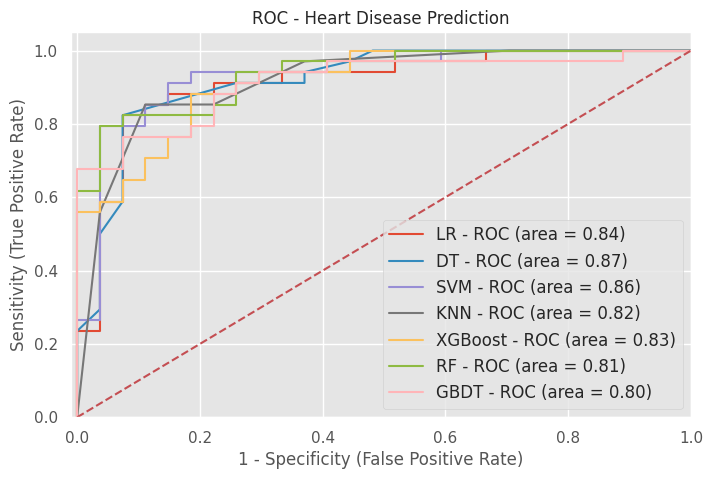

In [52]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Heart Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_heart_disease.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[85.25, 80.33, 86.89, 81.97, 83.61, 83.61, 100.0]
[84.48, 77.83, 85.95, 81.54, 83.00999999999999, 83.00999999999999, 80.07]


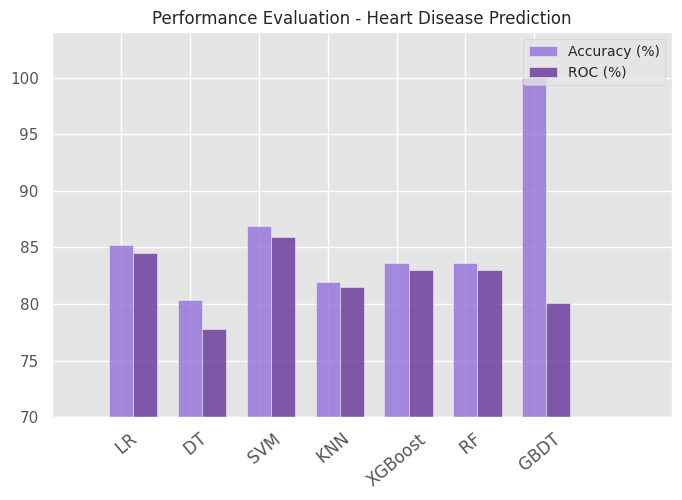

In [53]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(log_reg_acc,4), 100*round(dtc_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4), 
                  100*round(rand_clf_acc,4), 100*round(gbc_acc,4)]

for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([70, 104])

plt.title('Performance Evaluation - Heart Disease Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_heart_disease.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

In [54]:
from sklearn.model_selection import cross_val_score

def tune_model(model, param_grid, name):
    grid = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=0)
    grid.fit(X_train, y_train)
    print(f"{name} - Best Params: {grid.best_params_}")
    print(f"{name} - Best CV Score: {grid.best_score_:.4f}")
    return grid.best_estimator_

models = {
    'Logistic Regression': log_reg,
    'KNN': knn,
    'SVM': svc,
    'Decision Tree': dtc,
    'Random Forest': rand_clf,
    'Gradient Boosting': best_gbc,
    'XGBoost': xgb
}

results = []
for name, model in models.items():
    acc = accuracy_score(y_test, model.predict(X_test))
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    results.append((name, round(acc * 100, 2), round(auc * 100, 2)))

results_df = pd.DataFrame(results, columns=["Model", "Accuracy (%)", "AUC (%)"])
print(results_df.sort_values(by="Accuracy (%)", ascending=False))

                 Model  Accuracy (%)  AUC (%)
2                  SVM         86.89    93.03
0  Logistic Regression         85.25    91.07
4        Random Forest         83.61    93.90
6              XGBoost         83.61    91.50
1                  KNN         81.97    91.72
3        Decision Tree         78.69    81.05
5    Gradient Boosting         78.69    91.07


In [55]:
for name, model in models.items():
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    print(f"{name}: Train={train_acc:.2f}, Test={test_acc:.2f}, Gap={train_acc - test_acc:.2f}")

Logistic Regression: Train=0.84, Test=0.85, Gap=-0.01
KNN: Train=0.87, Test=0.82, Gap=0.05
SVM: Train=0.87, Test=0.87, Gap=0.00
Decision Tree: Train=0.86, Test=0.79, Gap=0.08
Random Forest: Train=0.98, Test=0.84, Gap=0.14
Gradient Boosting: Train=1.00, Test=0.79, Gap=0.21
XGBoost: Train=0.95, Test=0.84, Gap=0.12


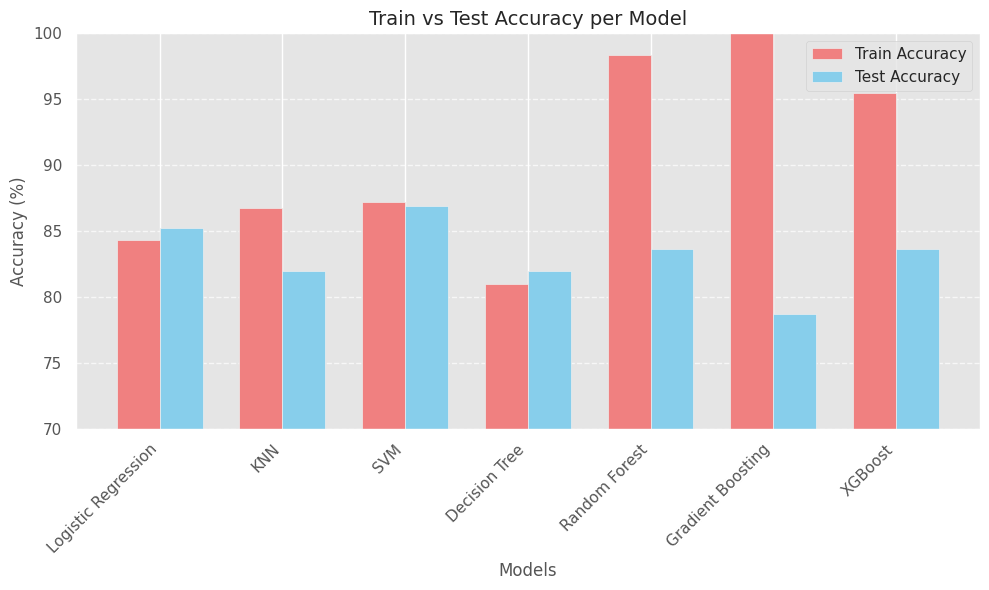

In [56]:
train_scores = []
test_scores = []

for name, model in models.items():
    model.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    train_scores.append(train_acc * 100)
    test_scores.append(test_acc * 100)

# Grafik çizimi
labels = list(models.keys())
x = np.arange(len(labels))
bar_width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, train_scores, bar_width, label='Train Accuracy', color='lightcoral')
plt.bar(x + bar_width/2, test_scores, bar_width, label='Test Accuracy', color='skyblue')

plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Train vs Test Accuracy per Model', fontsize=14)
plt.xticks(ticks=x, labels=labels, rotation=45, ha='right')
plt.ylim([70, 100])
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig("train_test_accuracy_comparison.jpeg", dpi=300, bbox_inches='tight')
plt.show()

/mnt/c/Users/Livan/OneDrive/Masaüstü/MEDICAI/medicai/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/mnt/c/Users/Livan/OneDrive/Masaüstü/MEDICAI/medicai/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/mnt/c/Users/Livan/OneDrive/Masaüstü/MEDICAI/medicai/lib/python3.11/site-packages/xgboost/core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/mnt/c/Users/Livan/OneDrive/Masaüstü/MEDICAI/

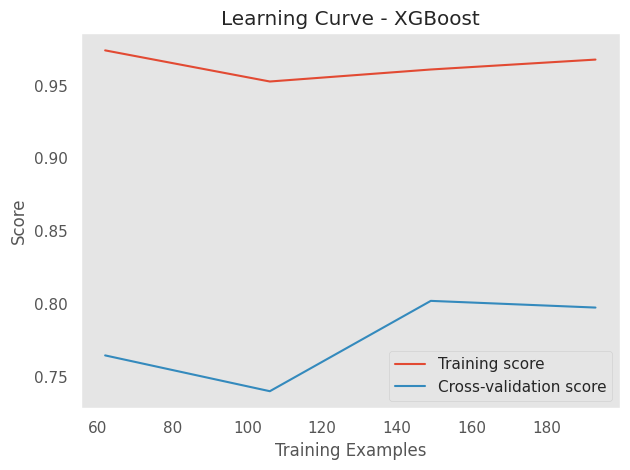

In [57]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
    
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_mean, label="Training score")
    plt.plot(train_sizes, test_mean, label="Cross-validation score")
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

plot_learning_curve(models['XGBoost'], "Learning Curve - XGBoost")

In [58]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    roc_auc = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
    print(f"{name} Mean CV ROC AUC: {roc_auc:.4f}")

Logistic Regression Mean CV ROC AUC: 0.8898
KNN Mean CV ROC AUC: 0.8554
SVM Mean CV ROC AUC: 0.8908
Decision Tree Mean CV ROC AUC: 0.8722
Random Forest Mean CV ROC AUC: 0.8933
Gradient Boosting Mean CV ROC AUC: 0.8623
XGBoost Mean CV ROC AUC: 0.8835


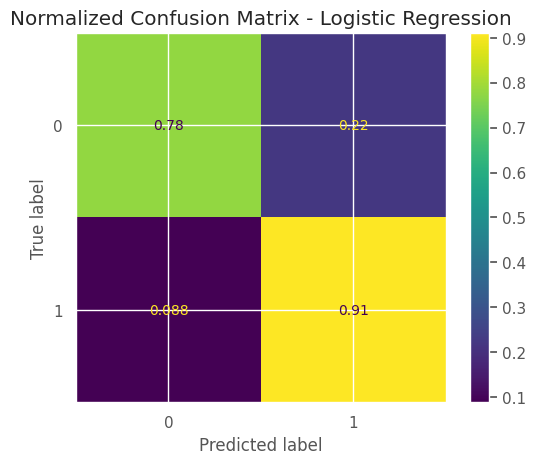

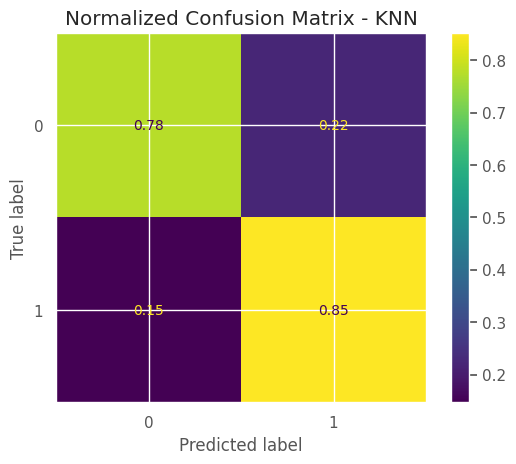

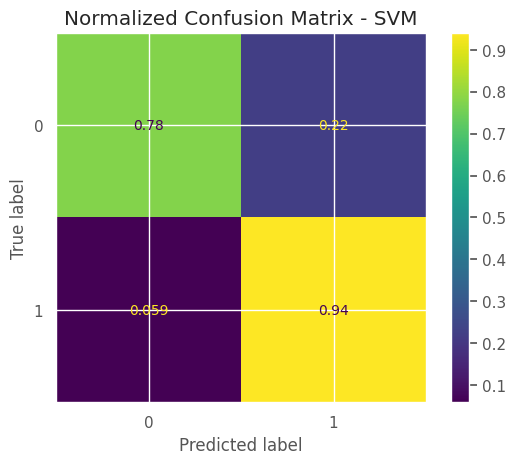

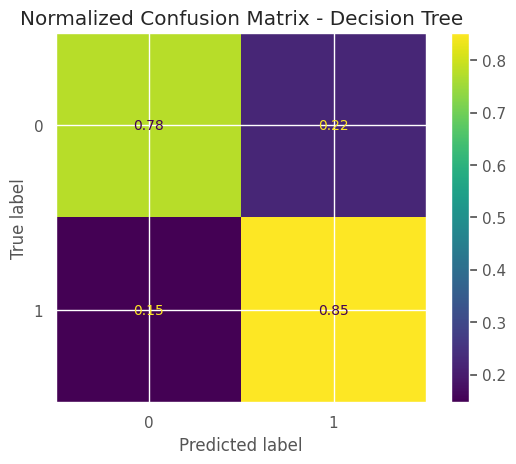

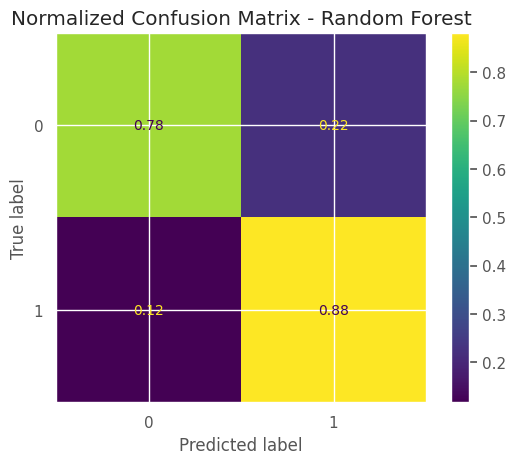

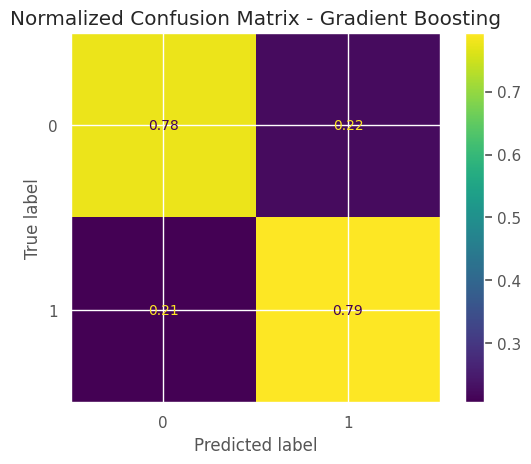

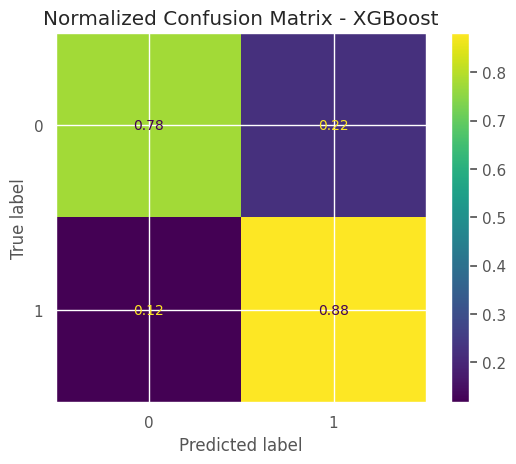

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay


n_models = len(models)
cols = 3 
rows = (n_models + cols - 1) // cols

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()


for idx, (name, model) in enumerate(models.items()):
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize='true', ax=axes[idx], cmap='Blues')
    axes[idx].set_title(f"Confusion Matrix - {name}", fontsize=10)


for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.suptitle("Normalized Confusion Matrices for All Models", fontsize=16, y=1.02)
plt.show()